##**Problem Statement**

**Detecting fraud for transactions in a payment gateway.

 **IndAvenue has started gaining traction due to its extremely low processing fees for handling online vendors’ digital payments.

 **This strategy has led to very low costs of acquiring new vendors.
  
  **is_fruad is the target varible in tha data

## Importing and Reading the data

In [1]:
# Importing the required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import statistics as stat

In [2]:
# Reading the train and test data.

train_data = pd.read_csv("/content/train_data-1611220940820.csv", na_values='?' ',')
test_data = pd.read_csv("/content/test_data-1611220982388.csv", na_values ='?' ',')

In [3]:
# Number of Records in the data

rows,cols = train_data.shape
print(f'There are {rows} Rows and {cols} Columns')

There are 76529 Rows and 11 Columns


In [4]:
# Displaying the first five records.

train_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


#EDA (Exploratory Data Analysis)



*   Understanding the data in a more detailed way.
*   Understanding the insights of the data through visualization of the data.





In [5]:
# Understanding the number of records (Number of fraud or not-fraud cases).

nfraud, yfraud = train_data['is_fraud'].value_counts()
print(f'There are a total of {rows} transactions of which there are {yfraud} fraudulent transactions.')

There are a total of 76529 transactions of which there are 154 fraudulent transactions.


In [6]:
# Summarizing information about the different columns in the data.

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


We can see that none of the features are having null or missing values, and also the data type of the features.

In [7]:
# Gathering and understanding statistical data from the dataset.

train_data.describe(include = 'all')

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529,76529.000000,76529,76529,76529,76529.000000,76529,76529.000000,76529.000000
unique,NaN,NaN,6,NaN,9,1,4,NaN,75811,NaN,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN,NaN
freq,NaN,NaN,30538,NaN,36306,76529,45560,NaN,12,NaN,NaN
mean,6.940200e+14,1.247483e+07,NaN,58497.189105,NaN,NaN,NaN,132.724348,NaN,2.255707,0.002012
std,7.867885e+14,1.205878e+07,NaN,36740.216787,NaN,NaN,NaN,2350.110900,NaN,0.732174,0.044814
min,8.000000e+00,1.000000e+00,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,NaN,78890.000000,NaN,NaN,NaN,52.000000,NaN,2.000000,0.000000


Checking and understanding the statistical data such as mean, median, min, max etc.

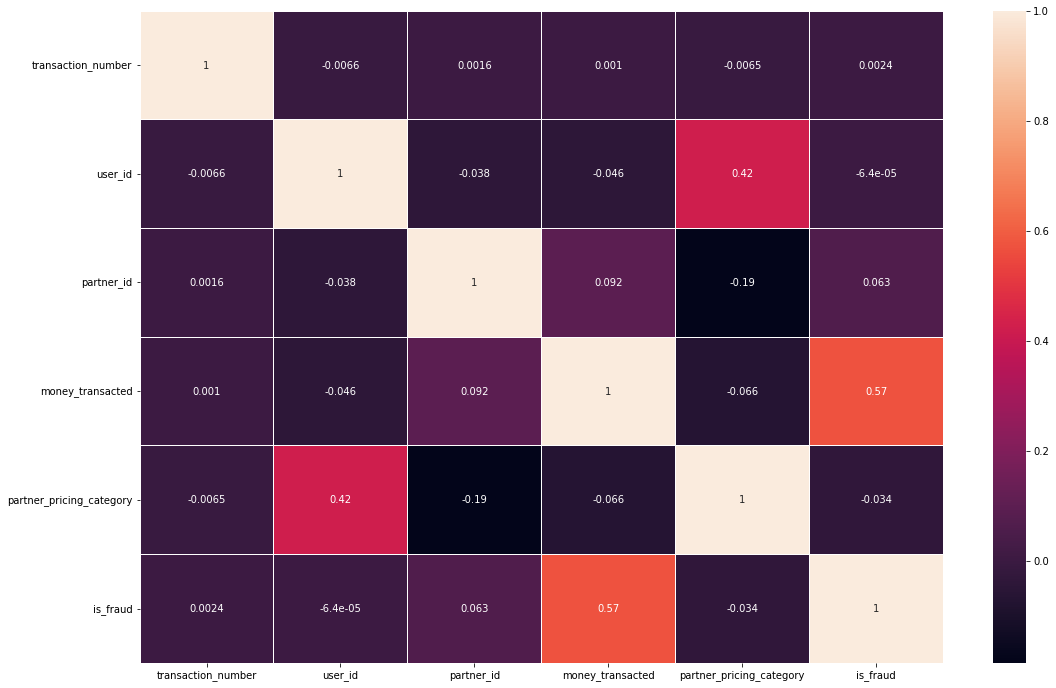

In [8]:
# Plotting a correlation heat map to visualize the correlation between various features.  

plt.figure(figsize = (18, 12))
sns.heatmap(data = train_data.corr(), annot = True, fmt ='.2g', linewidth = 1)
plt.show()

We can see that the "money_transacted" feature has the highest correlation with our target variable "is_fraud".

In [9]:
# Storing the fraudulent and valid transactions in different datasets for further insights

train_data_f = train_data[train_data['is_fraud']==1]
train_data_nf = train_data[train_data['is_fraud']==0]

In [10]:
# Printing the first five records of fraudulent transactions.

train_data_f.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
196,631960043718375,1695204,visa_master_credit_cards,118335,cat_1,IND_INR,other_pcs,40000.0,2017-01-18 15:09:59+00:00,2,1
571,2425548625856,7054336,visa_master_credit_cards,118335,cat_1,IND_INR,windows_pcs,6000.0,2017-01-24 00:44:25+00:00,2,1
1267,641842338376,19829209,other_debit_cards,118335,cat_1,IND_INR,other_pcs,10000.0,2016-12-04 12:22:20+00:00,0,1
1420,298707250627423,19829209,other_debit_cards,118335,cat_1,IND_INR,other_pcs,60000.0,2016-12-04 12:20:07+00:00,0,1
1811,1165348588684337,25542916,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,10000.0,2016-12-28 08:17:21+00:00,4,1


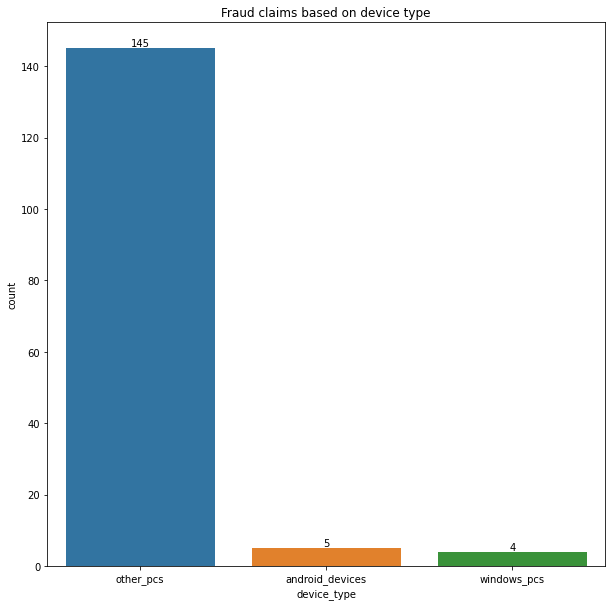

In [11]:
# Plotting a countplot to check the number of frauds per device-type.

plt.figure(figsize=(10,10))
ax = sns.countplot(x = train_data_f.device_type, data = train_data_f, order = train_data_f["device_type"].value_counts().index)
ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title("Fraud claims based on device type")
plt.show()

As we can see, majority of the fradulent transactions are initiated from the devices labelled as "other_pcs" followed by "android_devices" and "windows_pcs" 

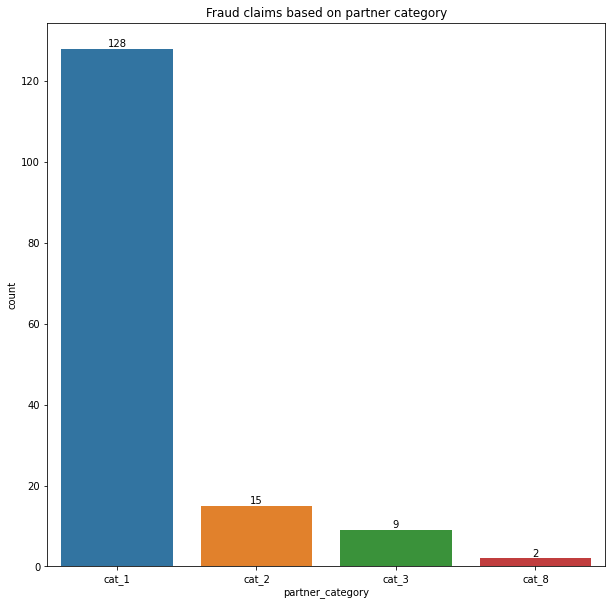

In [12]:
# Plotting another countplot to check the number of fraudulent transactions per partner-category"

plt.figure(figsize=(10,10))
ax = sns.countplot(x = train_data_f.partner_category, data = train_data_f, order = train_data_f["partner_category"].value_counts().index)
ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title("Fraud claims based on partner category")
plt.show()

The users which use the "cat_1" partners are more vulnerable to fraudulent activities.

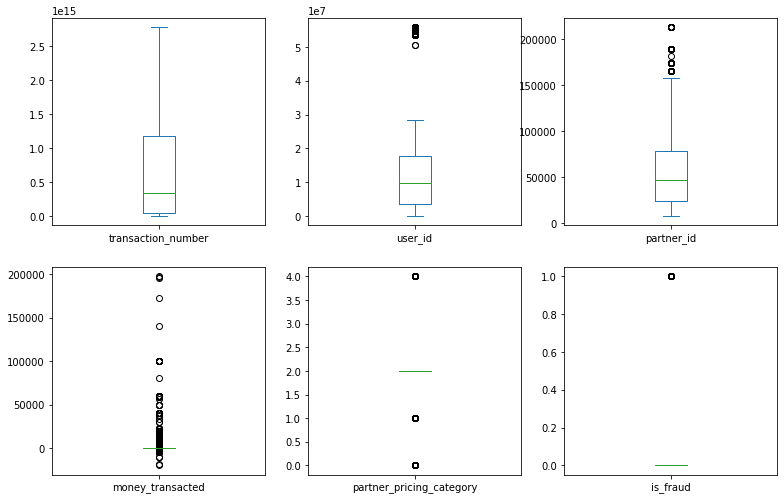

In [13]:
# Plotting a box plot to get information about the outliers of the features.

train_data.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(13,13))
plt.show()

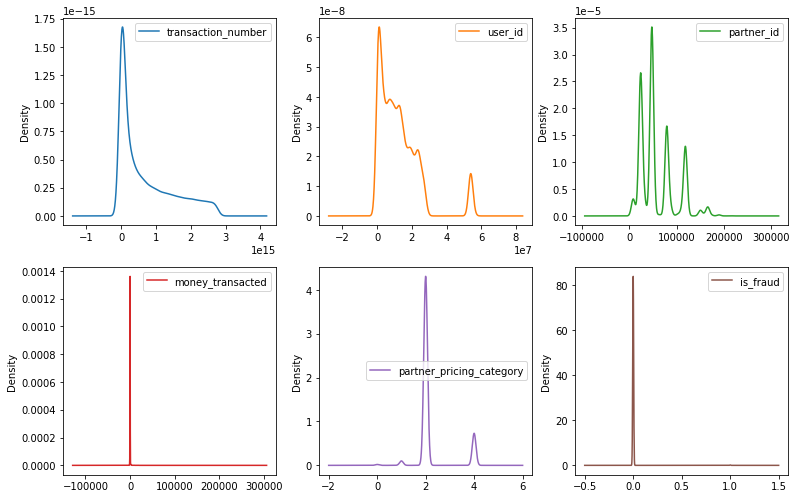

In [14]:
# Plotting the density plot to analyze the shape of the distribution of various features

train_data.plot(kind='density',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(13,13))
plt.show()

# Pre-Processing

 

*   Feature Engineering.
*   Handling missing values
*   Handling outliers.
*   Handling imbalanced data.
*   Encoding
*   Standardization









*   Performing feature-engineering and gathering more insights from the data.


In [15]:
# The feature can be further divided and more data can extracted

train_data['transaction_initiation'] = pd.to_datetime(train_data['transaction_initiation'])
test_data['transaction_initiation'] = pd.to_datetime(test_data['transaction_initiation'])
train_data['transaction_initiation'].dtypes

datetime64[ns, UTC]

In [16]:
train_data['year'] = train_data['transaction_initiation'].dt.year
train_data['month'] = train_data['transaction_initiation'].dt.month
train_data['day'] = train_data['transaction_initiation'].dt.day
test_data['year'] = test_data['transaction_initiation'].dt.year
test_data['month'] = test_data['transaction_initiation'].dt.month
test_data['day'] = test_data['transaction_initiation'].dt.day
train_data.drop(columns='transaction_initiation', axis='1', inplace=True)
test_data.drop(columns='transaction_initiation', axis='1', inplace=True)

In [17]:
train_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,year,month,day
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2,0,2016,11,15
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2,0,2017,1,11
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2,0,2016,12,7
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2,0,2017,1,11
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2,0,2016,11,16


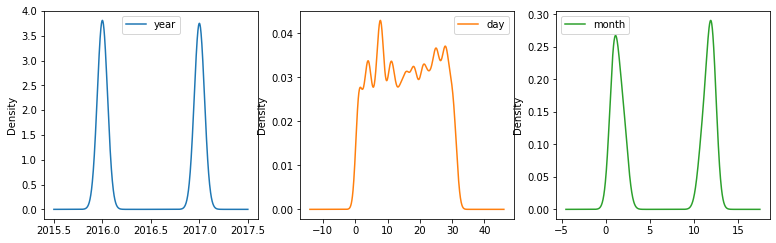

In [18]:
# Visualizing using the new features

new_cols = ["year", "day", "month"]
train_data[new_cols].plot(kind='density',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(13,13))
plt.show()

**Dropping duplicate records (if-any)**

In [19]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

**Checking for Null values** 

In [20]:
train_data.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
partner_pricing_category    0
is_fraud                    0
year                        0
month                       0
day                         0
dtype: int64

In [21]:
train_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
partner_pricing_category      int64
is_fraud                      int64
year                          int64
month                         int64
day                           int64
dtype: object

**Dropping the features which are continuous or which do not have much impact on the target-variable**


In [22]:
dataframe = test_data['transaction_number']     # Saving this feature as it may be useful for identifying a particular transaction
train_data=train_data.drop(['transaction_number','country','user_id','year','month','day'],axis=1)
test_data=test_data.drop(['transaction_number','country','user_id','year','month','day'],axis=1)

**Converting the columns which should be category**

In [23]:
for col in ['payment_method','partner_category','device_type', 'partner_pricing_category', 'is_fraud']:
    train_data[col] = train_data[col].astype('category')

In [24]:
for col in ['payment_method','partner_category','device_type', 'partner_pricing_category']:
    test_data[col] = test_data[col].astype('category')

**HANDLING OUTLIERS**


*   Finding the Q1, Q3, IQR, Lower Bound, Upper Bound
*   Replacing the outliers with mean of the IQR



In [25]:
cols = ['money_transacted', 'partner_id']
Q1 = train_data[cols].quantile(0.25)
Q3 = train_data[cols].quantile(0.75)
IQR = Q3 - Q1
lower_extreme = Q1 - 1.5 * IQR
upper_extreme = Q3 + 1.5 * IQR
print(IQR)

money_transacted       53.0
partner_id          55223.0
dtype: float64


*Replacing the outliers with the mean of the IQR*

In [26]:
out1 = train_data[(train_data[cols]<lower_extreme)].values
out2 = train_data[(train_data[cols]>upper_extreme)].values
for cols in cols:
  mean = train_data[cols].mean()
  train_data[cols].replace(out1, mean, inplace = True)
  train_data[cols].replace(out2, mean, inplace = True)

In [27]:
cols = ['money_transacted', 'partner_id']
Q1 = test_data[cols].quantile(0.25)
Q3 = test_data[cols].quantile(0.75)
IQR = Q3 - Q1
lower_extreme = Q1 - 1.5 * IQR
upper_extreme = Q3 + 1.5 * IQR
print(IQR)

money_transacted       61.0
partner_id          55223.0
dtype: float64


In [28]:
out1 = test_data[(test_data[cols]<lower_extreme)].values
out2 = test_data[(test_data[cols]>upper_extreme)].values
for cols in cols:
  mean = test_data[cols].mean()
  test_data[cols].replace(out1, mean, inplace = True)
  test_data[cols].replace(out2, mean, inplace = True)

**Encoding**

*Converting categorical features into numerical*

In [29]:
# Converting categorical features into numerical using LabelEncoder

cat_attr_names = train_data.select_dtypes(include=['category']).columns
label_encoder = preprocessing.LabelEncoder()
for cat_attr_names in cat_attr_names:
  train_data[cat_attr_names] = label_encoder.fit_transform(train_data[cat_attr_names])
#train_data = pd.get_dummies(columns=cat_attr_names, data=train_data, prefix=cat_attr_names, prefix_sep="_", drop_first=True)
cat_attr_names = test_data.select_dtypes(include=['category']).columns
for cat_attr_names in cat_attr_names:
  test_data[cat_attr_names] = label_encoder.fit_transform(test_data[cat_attr_names])
#test_data = pd.get_dummies(columns=cat_attr_names, data=test_data, prefix=cat_attr_names, prefix_sep="_", drop_first=True)

**TRAIN TEST SPLIT**

*Dividing the data into two different sets "Train" and "Test"*

In [30]:
# Performing Train-Test-Split

y=train_data["is_fraud"]
X=train_data.drop('is_fraud', axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(53570, 6)
(22959, 6)
(53570,)
(22959,)


**Handling class-imbalance using SMOTE**

In [32]:
# from imblearn.over_sampling import SMOTE
# oversampled = SMOTE(random_state=0)
# X_train, y_train = oversampled.fit_resample(X_train, y_train)

**Standardization**

*Standardizing or scaling the feature values into a more discrete limit such as [0,1] or [-1,1]*

In [33]:
num_atr = X_train.select_dtypes(['int64','float64']).columns
num_atr

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'money_transacted', 'partner_pricing_category'],
      dtype='object')

In [34]:
# Standardization of the features using StandardScaler() 

scaler=StandardScaler()
scaler.fit(X_train[num_atr])
X_train[num_atr]=scaler.transform(X_train[num_atr])
X_test[num_atr]=scaler.transform(X_test[num_atr])

# Model Building and Evaluating

**Building and fitting the data into various types of models**

**Choosing the best model based on the metrics**

In [35]:
# Building various models 

model1=KNeighborsClassifier()
model2=LogisticRegression()
model3=DecisionTreeClassifier()
model4=RandomForestClassifier()
model5=XGBClassifier()

In [36]:
# Fitting the data into respective models

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [37]:
# Predicting using the "Train" dataset

train_prds1=model1.predict(X_train)
train_prds2=model2.predict(X_train)
train_prds3=model3.predict(X_train)
train_prds4=model4.predict(X_train)
train_prds5=model5.predict(X_train)

In [38]:
# Predicting using the "Test" dataset

test_prds1=model1.predict(X_test)
test_prds2=model2.predict(X_test)
test_prds3=model3.predict(X_test)
test_prds4=model4.predict(X_test)
test_prds5=model5.predict(X_test)

**Evaluation**

*Various evaluation metrics are available, we'll be choosing the F1-Score*

In [39]:
print('========Train=======')
print(f"Confusion Matrix of KNN \n{confusion_matrix(y_train, train_prds1)}")
print('========Train=======')
print(f"Confusion Matrix of LR \n{confusion_matrix(y_train, train_prds2)}")
print('========Train=======')
print(f"Confusion Matrix of DT \n{confusion_matrix(y_train, train_prds3)}")
print('========Train=======')
print(f"Confusion Matrix of RFC \n{confusion_matrix(y_train, train_prds4)}")
print('========Train=======')
print(f"Confusion Matrix of XGB \n{confusion_matrix(y_train, train_prds5)}")

========Train=======
Confusion Matrix of KNN 
[[53466     2]
 [   26    76]]
========Train=======
Confusion Matrix of LR 
[[53452    16]
 [   72    30]]
========Train=======
Confusion Matrix of DT 
[[53467     1]
 [   11    91]]
========Train=======
Confusion Matrix of RFC 
[[53467     1]
 [   11    91]]
========Train=======
Confusion Matrix of XGB 
[[53467     1]
 [   13    89]]


In [40]:
print('========Test=======')
print(f"Confusion Matrix of KNN \n{confusion_matrix(y_test, test_prds1)}")
print('========Test=======')
print(f"Confusion Matrix of LR \n{confusion_matrix(y_test, test_prds2)}")
print('========Test=======')
print(f"Confusion Matrix of DT \n{confusion_matrix(y_test, test_prds3)}")
print('========Test=======')
print(f"Confusion Matrix of RFC \n{confusion_matrix(y_test, test_prds4)}")
print('========Test=======')
print(f"Confusion Matrix of XGB \n{confusion_matrix(y_test, test_prds5)}")

========Test=======
Confusion Matrix of KNN 
[[22907     0]
 [   18    34]]
========Test=======
Confusion Matrix of LR 
[[22899     8]
 [   34    18]]
========Test=======
Confusion Matrix of DT 
[[22906     1]
 [    9    43]]
========Test=======
Confusion Matrix of RFC 
[[22905     2]
 [   13    39]]
========Test=======
Confusion Matrix of XGB 
[[22906     1]
 [   10    42]]


In [41]:
print("train f1_score of KNeighborsClassifier :",f1_score (y_train,train_prds1,))
print("train f1_score of LogisticRegression :", f1_score(y_train,train_prds2))
print("train f1_score of DecisionTreeClassifier :" ,f1_score(y_train,train_prds3))
print("train f1_score of RandomForestClassifier :" ,f1_score(y_train,train_prds4))
print("train f1_score of XGBClassifier :" ,f1_score(y_train,train_prds5))

train f1_score of KNeighborsClassifier : 0.8444444444444443
train f1_score of LogisticRegression : 0.4054054054054054
train f1_score of DecisionTreeClassifier : 0.9381443298969072
train f1_score of RandomForestClassifier : 0.9381443298969072
train f1_score of XGBClassifier : 0.9270833333333334


In [42]:
print("test f1_score of KNeighborsClassifier :" ,f1_score(y_test,test_prds1))
print("test f1_score of LogisticRegression :" ,f1_score(y_test,test_prds2))
print("test f1_score of DecisionTreeClassifier :" ,f1_score(y_test,test_prds3))
print("test f1_score of RandomForestClassifier :" ,f1_score(y_test,test_prds4))
print("test f1_score of XGBClassifier :" ,f1_score(y_test,test_prds5))

test f1_score of KNeighborsClassifier : 0.7906976744186047
test f1_score of LogisticRegression : 0.46153846153846156
test f1_score of DecisionTreeClassifier : 0.8958333333333334
test f1_score of RandomForestClassifier : 0.8387096774193549
test f1_score of XGBClassifier : 0.8842105263157894


**The best F1-Score was given by the DecisionTreeClassifier as it has the highest score**

**Hence we will be using the DecisionTreeClassifier to predict**

# Predicting and Saving the model

**Predicting on TestData using DecisionTreeClassifier**

In [43]:
pred = model3.predict(test_data)

**Creating a dataframe with "Transaction number" and "Target Variable"**

**Converting and saving the dataframe into a CSV file**

In [44]:
predictions = pd.DataFrame({'transaction_number': dataframe,'is_Fraud': pred})
predictions.to_csv('submission.csv')